In [57]:
import tensorflow as tf
import numpy as np

In [58]:
hello=tf.constant("hello world")

In [59]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [60]:
sess=tf.Session()

In [61]:
sess.run(hello)

b'hello world'

In [62]:
x=tf.placeholder(tf.int32)

In [63]:
y=tf.placeholder(tf.int32)

In [64]:
add=tf.add(x,y)
sub=tf.subtract(x,y)
d={x:20,y:30}

In [65]:
with tf.Session() as sess:
    print("Addition",sess.run(add,feed_dict={x:20,y:30}))
    print("Subtraction",sess.run(sub,feed_dict=d))

Addition 50
Subtraction -10


In [66]:
a=np.array([[5.0,5.0]])
b=np.array([[2.0],[3.0]])

In [67]:
mat1=tf.constant(a)
mat2=tf.constant(b)

In [68]:
matrix_multi=tf.matmul(mat1,mat2)

In [69]:
with tf.Session() as sess:
    result=sess.run(matrix_multi)
    print(result)

[[ 25.]]


In [70]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [71]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [72]:
type(mnist.train.images)

numpy.ndarray

In [73]:
mnist.train.images[2].shape

(784,)

In [74]:
sample = mnist.train.images[2].reshape(28,28)

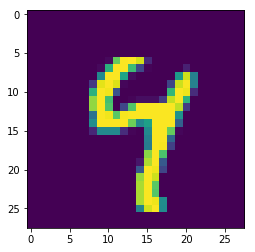

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)

In [166]:
learning_rate = 0.001
training_epochs = 100
batch_size = 10

In [167]:
n_hidden_1=256
n_hidden_2=256
n_input=784
n_classes=10
n_samples=mnist.train.num_examples

In [168]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [169]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [170]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [171]:
x=tf.placeholder('float',[None,n_input])

In [172]:
y=tf.placeholder('float',[None,n_classes])

In [173]:
pred=multilayer_perceptron(x,weights,biases)

In [174]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [175]:
t=mnist.train.next_batch(10)

In [176]:
sess=tf.InteractiveSession()

In [177]:
init=tf.initialize_all_variables()

In [178]:
sess.run(init)

In [179]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=62.0392
Epoch: 2 cost=15.7060
Epoch: 3 cost=8.2226
Epoch: 4 cost=4.9849
Epoch: 5 cost=3.3761
Epoch: 6 cost=2.5059
Epoch: 7 cost=1.9453
Epoch: 8 cost=1.6961
Epoch: 9 cost=1.3375
Epoch: 10 cost=1.2000
Epoch: 11 cost=1.0101
Epoch: 12 cost=0.9986
Epoch: 13 cost=0.8430
Epoch: 14 cost=0.8681
Epoch: 15 cost=0.7564
Epoch: 16 cost=0.6720
Epoch: 17 cost=0.6811
Epoch: 18 cost=0.6380
Epoch: 19 cost=0.6087
Epoch: 20 cost=0.6201
Epoch: 21 cost=0.5997
Epoch: 22 cost=0.5225
Epoch: 23 cost=0.5079
Epoch: 24 cost=0.5185
Epoch: 25 cost=0.4527
Epoch: 26 cost=0.4337
Epoch: 27 cost=0.4612
Epoch: 28 cost=0.4537
Epoch: 29 cost=0.4064
Epoch: 30 cost=0.4631
Epoch: 31 cost=0.3716
Epoch: 32 cost=0.3999
Epoch: 33 cost=0.4006
Epoch: 34 cost=0.4368
Epoch: 35 cost=0.3531
Epoch: 36 cost=0.3907
Epoch: 37 cost=0.4032
Epoch: 38 cost=0.3321
Epoch: 39 cost=0.3215
Epoch: 40 cost=0.3427
Epoch: 41 cost=0.3135
Epoch: 42 cost=0.3176
Epoch: 43 cost=0.2765
Epoch: 44 cost=0.2772
Epoch: 45 cost=0.3101
Epoch: 46 cost=0.

In [180]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [181]:
print(correct_predictions[0])

Tensor("strided_slice_6:0", shape=(), dtype=bool)


In [182]:
correct_predictions = tf.cast(correct_predictions, "float")

In [183]:
print(correct_predictions[0])

Tensor("strided_slice_7:0", shape=(), dtype=float32)


In [184]:
accuracy = tf.reduce_mean(correct_predictions)

In [185]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [186]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [187]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.979
